<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/da_cv_fer_sfew_expw_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning repository
Importing files regarding dataset, model, mains and utils

In [1]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 156 (delta 33), reused 58 (delta 27), pack-reused 81
Receiving objects: 100% (156/156), 8.32 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (68/68), done.


Installing dependencies

In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
!pip install -q opendatasets # quient install, for some reason this does not get installed with requirements

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

## Libraries and Initializations

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import *
from da_cv_fer.model_DANN import DANN
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import *
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np


### Initializing configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

## SFEW Dataset

Creating dataloader objects.

It copies files from a google drive, unzips it and sets that for use

details: da_cv_fer.ds_sfew.DatasetSFEW

In [5]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
sfew = DatasetSFEW()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


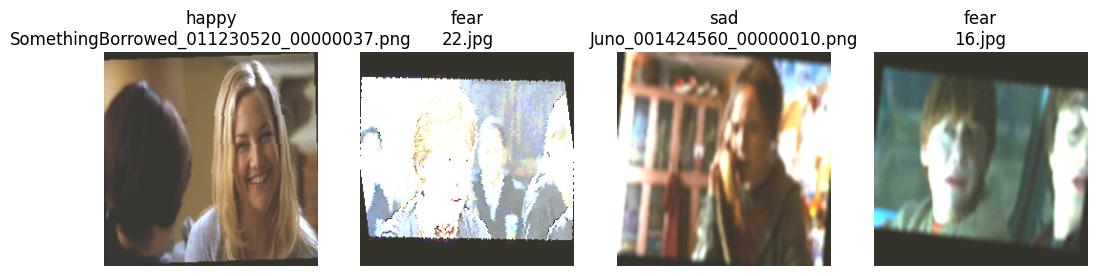

In [7]:
show_batch(sfew_train_loader,sfew.labels,4)

## EXPW Dataset
Creating dataset and dataloader objects.
Split into train and val.

`details: da_cv_fer.ds_expw.EXPW`
<br>
Please be patient, it takes around 3 minutes to download data set

In [8]:
expw_obj = EXPW()
expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
in EXPW()...
Directory dataset/expwds created successfully.


100%|██████████| 7.68G/7.68G [01:29<00:00, 92.1MB/s]



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
Directory dataset/expwds already exists.
Directory dataset/expwds already exists.
 length of EXPW dataset : 54476 , 54476


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


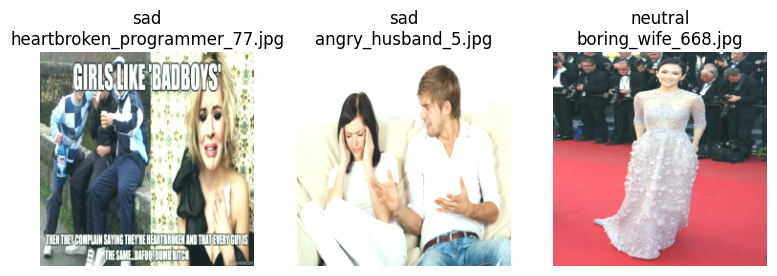

In [9]:
show_batch(expw_train_loader,expw_train_ds.labels,3)

## Creating Dataloaders for source and target

In [10]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }

expw_loader = {'name': 'expw',
               'train':expw_train_loader,
               'val':expw_val_loader
               }

data_loader = {'source' : sfew_loader,
               'target' : expw_loader}

source_name = data_loader['source']['name']
target_name = data_loader['target']['name']

## Initializing Model
details are present in `model_DANN`

In [11]:
model = DANN(num_classes=7,backbone='resnet18', dropout=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]

feature extractor backbone created using resnet18 model


In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)

cuda


Running model for single run. checking output shapes

In [13]:
for usage, dict_data_loader in data_loader.items(): ## {'source' : sfew_loader,'target' : expw_loader}
    print('-'*80)
    print(usage)
    for k, v in dict_data_loader.items(): # {'name': 'sfew','train':sfew_train_loader,'val':sfew_val_loader}
      if k == 'name':
        print (f'--------{k} of dataset : {v}--------')
      else:
        print (f'   --------type : {k}--------')
        batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
        images, labels = batch[0].to(device), batch[1].to(device)
        print( "Input:\n","Input Image: ",images.shape, ", labels: ",labels.shape)

        x_labels, x_domains, x_features = model(images) # forward pass
        print("Output:\n", "labels: ", x_labels.shape, ", domains: ",x_domains.shape, ", features: ", x_features.shape)


--------------------------------------------------------------------------------
source
--------name of dataset : sfew--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
--------------------------------------------------------------------------------
target
--------name of dataset : expw--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , l

In [14]:
# #@title Weight Initialization

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       nn.init.xavier_normal_(m.weight)
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight)
#       nn.init.zeros_(m.bias)

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       # nn.init.xavier_normal_(m.weight)
#       pass # not initialising Conv layers as they are pretrained
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight) # Linear layers are added on
#       nn.init.zeros_(m.bias)

## Non DANN: Training, Validating, Saving

### Early Stopping Scheduler - ReduceLRonPlateau

In [15]:
# def early_stopping_difference(list_loss: list, patience = 5, difference = 0.0003):
#   if len(list_loss) > patience:
#     reverse_list_loss = list_loss[::-1]
#     reverse_list_loss = reverse_list_loss[0:patience+1]
#     for index in range(0,len(reverse_list_loss)-1):
#       if abs(reverse_list_loss[index] - reverse_list_loss[index+1]) > difference:
#         return False
#     return True
#   else:
#     return False

Configuration towards execution

In [16]:
runconfig = RunConfig()
device = runconfig.device

non_dann_model = DANN(num_classes=7, backbone = 'resnet18')
non_dann_model = non_dann_model.to(device)
best_non_dann_model = DANN(num_classes=7, backbone = 'resnet18').to(device)
# non_dann_model.apply(weights_init) # initializing model, only linear layers

#learning rate
lr = float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
# EPOCHS = 5 #override
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

# Initialize variables to track the best validation loss and the best model state
best_val_loss = float('inf')
best_model_state = None

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based

feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model
EPOCHS 50


In [17]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model(model = non_dann_model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(avg_epoch_loss) #applying scheduler on training loss

    #Validate Model
    correct, avg_epoch_val_loss = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)
    # Check if the current model has the best validation loss
    print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
    if avg_epoch_val_loss < best_val_loss:
      best_val_loss = avg_epoch_val_loss
      # save the current model state as the best model state
      best_model_state = deepcopy(non_dann_model.state_dict())
      print(f'Updated the best model with validation loss: {best_val_loss}\n')


    if early_stopping_difference(val_losses,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

## using params of best model to update model
if best_model_state: # only update if best model has been saved, else the last one would be picked up
  # best_non_dann_model.load_state_dict(best_model_state)
  non_dann_model.load_state_dict(best_model_state)
  print('Best model loaded')


print(f'Validation results with {source_name}')

correct, test_loss_source = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)

print(f'Test results with {target_name}')
correct, test_loss_target = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['target']['val'], # target val loader
                                    class_loss_function = criterion_class)

dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                       'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}




------ Training started for Non DANN Model ---- 
starting LR : 0.001
EPOCH: 1  of  50
epoch = 1...in training function


Loss=1.8597917556762695 Accuracy=139/958(14.51%) Epoch Avg loss=0.12523191 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.66it/s]


Test / Val: Average loss: 0.1270, Accuracy: 73/436 (16.74%)

Last Epoch Val Loss = 0.12703008197863166 | Best Val Loss = inf
Updated the best model with validation loss: 0.12703008197863166

EPOCH: 2  of  50
epoch = 2...in training function


Loss=2.0993945598602295 Accuracy=228/958(23.80%) Epoch Avg loss=0.11623485 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.91it/s]


Test / Val: Average loss: 0.1260, Accuracy: 74/436 (16.97%)

Last Epoch Val Loss = 0.12599170344685195 | Best Val Loss = 0.12703008197863166
Updated the best model with validation loss: 0.12599170344685195

EPOCH: 3  of  50
epoch = 3...in training function


Loss=1.9902423620224 Accuracy=279/958(29.12%) Epoch Avg loss=0.11373929 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.60it/s]


Test / Val: Average loss: 0.1259, Accuracy: 72/436 (16.51%)

Last Epoch Val Loss = 0.1259342648020578 | Best Val Loss = 0.12599170344685195
Updated the best model with validation loss: 0.1259342648020578

EPOCH: 4  of  50
epoch = 4...in training function


Loss=1.5787171125411987 Accuracy=293/958(30.58%) Epoch Avg loss=0.11074541 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.06it/s]


Test / Val: Average loss: 0.1293, Accuracy: 82/436 (18.81%)

Last Epoch Val Loss = 0.12927905408614274 | Best Val Loss = 0.1259342648020578
EPOCH: 5  of  50
epoch = 5...in training function


Loss=1.586076021194458 Accuracy=288/958(30.06%) Epoch Avg loss=0.10942858 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  4.00it/s]


Test / Val: Average loss: 0.1263, Accuracy: 77/436 (17.66%)

Last Epoch Val Loss = 0.12626463420894168 | Best Val Loss = 0.1259342648020578
EPOCH: 6  of  50
epoch = 6...in training function


Loss=1.739895224571228 Accuracy=341/958(35.59%) Epoch Avg loss=0.10633271 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.97it/s]


Test / Val: Average loss: 0.1291, Accuracy: 70/436 (16.06%)

Last Epoch Val Loss = 0.12906593056993748 | Best Val Loss = 0.1259342648020578
EPOCH: 7  of  50
epoch = 7...in training function


Loss=1.4649684429168701 Accuracy=367/958(38.31%) Epoch Avg loss=0.10153154 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.05it/s]


Test / Val: Average loss: 0.1282, Accuracy: 88/436 (20.18%)

Last Epoch Val Loss = 0.12818176073765536 | Best Val Loss = 0.1259342648020578
EPOCH: 8  of  50
epoch = 8...in training function


Loss=1.2840467691421509 Accuracy=391/958(40.81%) Epoch Avg loss=0.09900112 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.05it/s]


Test / Val: Average loss: 0.1304, Accuracy: 84/436 (19.27%)

Last Epoch Val Loss = 0.13043512226244725 | Best Val Loss = 0.1259342648020578
EPOCH: 9  of  50
epoch = 9...in training function


Loss=1.9673353433609009 Accuracy=417/958(43.53%) Epoch Avg loss=0.09586275 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.08it/s]


Test / Val: Average loss: 0.1294, Accuracy: 79/436 (18.12%)

Last Epoch Val Loss = 0.12935765648106917 | Best Val Loss = 0.1259342648020578
EPOCH: 10  of  50
epoch = 10...in training function


Loss=1.1771453619003296 Accuracy=444/958(46.35%) Epoch Avg loss=0.08914850 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.94it/s]


Test / Val: Average loss: 0.1322, Accuracy: 78/436 (17.89%)

Last Epoch Val Loss = 0.1322347786995249 | Best Val Loss = 0.1259342648020578
EPOCH: 11  of  50
epoch = 11...in training function


Loss=1.165534496307373 Accuracy=495/958(51.67%) Epoch Avg loss=0.08343995 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.02it/s]


Test / Val: Average loss: 0.1335, Accuracy: 82/436 (18.81%)

Last Epoch Val Loss = 0.13345652135140304 | Best Val Loss = 0.1259342648020578
EPOCH: 12  of  50
epoch = 12...in training function


Loss=1.094503402709961 Accuracy=517/958(53.97%) Epoch Avg loss=0.07882814 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]


Test / Val: Average loss: 0.1365, Accuracy: 99/436 (22.71%)

Last Epoch Val Loss = 0.1365199901095224 | Best Val Loss = 0.1259342648020578
EPOCH: 13  of  50
epoch = 13...in training function


Loss=1.3735970258712769 Accuracy=572/958(59.71%) Epoch Avg loss=0.07301740 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.96it/s]


Test / Val: Average loss: 0.1376, Accuracy: 87/436 (19.95%)

Last Epoch Val Loss = 0.13759652436326403 | Best Val Loss = 0.1259342648020578
EPOCH: 14  of  50
epoch = 14...in training function


Loss=1.4315062761306763 Accuracy=594/958(62.00%) Epoch Avg loss=0.06910385 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.03it/s]


Test / Val: Average loss: 0.1424, Accuracy: 84/436 (19.27%)

Last Epoch Val Loss = 0.1424374924887211 | Best Val Loss = 0.1259342648020578
EPOCH: 15  of  50
epoch = 15...in training function


Loss=0.7230731844902039 Accuracy=620/958(64.72%) Epoch Avg loss=0.06363319 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.96it/s]


Test / Val: Average loss: 0.1443, Accuracy: 89/436 (20.41%)

Last Epoch Val Loss = 0.1443142647590112 | Best Val Loss = 0.1259342648020578
EPOCH: 16  of  50
epoch = 16...in training function


Loss=0.9496539235115051 Accuracy=656/958(68.48%) Epoch Avg loss=0.05784802 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.66it/s]


Test / Val: Average loss: 0.1475, Accuracy: 86/436 (19.72%)

Last Epoch Val Loss = 0.14752402546208934 | Best Val Loss = 0.1259342648020578
EPOCH: 17  of  50
epoch = 17...in training function


Loss=0.9643902778625488 Accuracy=674/958(70.35%) Epoch Avg loss=0.05611255 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]


Test / Val: Average loss: 0.1438, Accuracy: 92/436 (21.10%)

Last Epoch Val Loss = 0.14376838792354688 | Best Val Loss = 0.1259342648020578
EPOCH: 18  of  50
epoch = 18...in training function


Loss=0.839960515499115 Accuracy=703/958(73.38%) Epoch Avg loss=0.05060454 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.80it/s]


Test / Val: Average loss: 0.1411, Accuracy: 98/436 (22.48%)

Last Epoch Val Loss = 0.14110481629677868 | Best Val Loss = 0.1259342648020578
EPOCH: 19  of  50
epoch = 19...in training function


Loss=0.788392961025238 Accuracy=725/958(75.68%) Epoch Avg loss=0.04654387 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.85it/s]


Test / Val: Average loss: 0.1550, Accuracy: 96/436 (22.02%)

Last Epoch Val Loss = 0.15495132470349654 | Best Val Loss = 0.1259342648020578
EPOCH: 20  of  50
epoch = 20...in training function


Loss=0.7280374765396118 Accuracy=752/958(78.50%) Epoch Avg loss=0.04113118 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.91it/s]


Test / Val: Average loss: 0.1533, Accuracy: 99/436 (22.71%)

Last Epoch Val Loss = 0.15330483634537512 | Best Val Loss = 0.1259342648020578
EPOCH: 21  of  50
epoch = 21...in training function


Loss=0.536574125289917 Accuracy=773/958(80.69%) Epoch Avg loss=0.03748018 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]


Test / Val: Average loss: 0.1539, Accuracy: 107/436 (24.54%)

Last Epoch Val Loss = 0.15393415038738775 | Best Val Loss = 0.1259342648020578
EPOCH: 22  of  50
epoch = 22...in training function


Loss=0.4213082492351532 Accuracy=768/958(80.17%) Epoch Avg loss=0.03731423 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.94it/s]


Test / Val: Average loss: 0.1514, Accuracy: 101/436 (23.17%)

Last Epoch Val Loss = 0.15140715733580634 | Best Val Loss = 0.1259342648020578
EPOCH: 23  of  50
epoch = 23...in training function


Loss=0.7222479581832886 Accuracy=783/958(81.73%) Epoch Avg loss=0.03425861 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]


Test / Val: Average loss: 0.1570, Accuracy: 94/436 (21.56%)

Last Epoch Val Loss = 0.15698439648392004 | Best Val Loss = 0.1259342648020578
EPOCH: 24  of  50
epoch = 24...in training function


Loss=0.6389738321304321 Accuracy=791/958(82.57%) Epoch Avg loss=0.03293656 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.90it/s]


Test / Val: Average loss: 0.1607, Accuracy: 99/436 (22.71%)

Last Epoch Val Loss = 0.1606885326018027 | Best Val Loss = 0.1259342648020578
EPOCH: 25  of  50
epoch = 25...in training function


Loss=0.5302814841270447 Accuracy=804/958(83.92%) Epoch Avg loss=0.03222751 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]


Test / Val: Average loss: 0.1637, Accuracy: 87/436 (19.95%)

Last Epoch Val Loss = 0.16374350715120997 | Best Val Loss = 0.1259342648020578
EPOCH: 26  of  50
epoch = 26...in training function


Loss=0.5552738904953003 Accuracy=795/958(82.99%) Epoch Avg loss=0.03073348 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.96it/s]


Test / Val: Average loss: 0.1565, Accuracy: 96/436 (22.02%)

Last Epoch Val Loss = 0.15652487338136095 | Best Val Loss = 0.1259342648020578
EPOCH: 27  of  50
epoch = 27...in training function


Loss=0.12638716399669647 Accuracy=798/958(83.30%) Epoch Avg loss=0.02844243 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.94it/s]


Test / Val: Average loss: 0.1545, Accuracy: 109/436 (25.00%)

Last Epoch Val Loss = 0.15452371524014605 | Best Val Loss = 0.1259342648020578
EPOCH: 28  of  50
epoch = 28...in training function


Loss=0.524916410446167 Accuracy=846/958(88.31%) Epoch Avg loss=0.02361626 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.95it/s]


Test / Val: Average loss: 0.1668, Accuracy: 92/436 (21.10%)

Last Epoch Val Loss = 0.16678552479918943 | Best Val Loss = 0.1259342648020578
EPOCH: 29  of  50
epoch = 29...in training function


Loss=0.3087577819824219 Accuracy=851/958(88.83%) Epoch Avg loss=0.02251427 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.89it/s]


Test / Val: Average loss: 0.1672, Accuracy: 89/436 (20.41%)

Last Epoch Val Loss = 0.16716938144570098 | Best Val Loss = 0.1259342648020578
EPOCH: 30  of  50
epoch = 30...in training function


Loss=0.5296902060508728 Accuracy=835/958(87.16%) Epoch Avg loss=0.02324332 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.99it/s]


Test / Val: Average loss: 0.1768, Accuracy: 90/436 (20.64%)

Last Epoch Val Loss = 0.17676966343450984 | Best Val Loss = 0.1259342648020578
EPOCH: 31  of  50
epoch = 31...in training function


Loss=1.0889521837234497 Accuracy=850/958(88.73%) Epoch Avg loss=0.02362217 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]


Test / Val: Average loss: 0.1727, Accuracy: 100/436 (22.94%)

Last Epoch Val Loss = 0.17269597797218814 | Best Val Loss = 0.1259342648020578
EPOCH: 32  of  50
epoch = 32...in training function


Loss=0.43875831365585327 Accuracy=865/958(90.29%) Epoch Avg loss=0.02028109 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.81it/s]


Test / Val: Average loss: 0.1707, Accuracy: 97/436 (22.25%)

Last Epoch Val Loss = 0.17072036124150688 | Best Val Loss = 0.1259342648020578
EPOCH: 33  of  50
epoch = 33...in training function


Loss=0.38452914357185364 Accuracy=865/958(90.29%) Epoch Avg loss=0.01959493 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.97it/s]


Test / Val: Average loss: 0.1786, Accuracy: 102/436 (23.39%)

Last Epoch Val Loss = 0.17863695829286488 | Best Val Loss = 0.1259342648020578
EPOCH: 34  of  50
epoch = 34...in training function


Loss=0.22558490931987762 Accuracy=849/958(88.62%) Epoch Avg loss=0.02021810 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.03it/s]


Test / Val: Average loss: 0.1648, Accuracy: 95/436 (21.79%)

Last Epoch Val Loss = 0.16478408640677775 | Best Val Loss = 0.1259342648020578
EPOCH: 35  of  50
epoch = 35...in training function


Loss=0.11738163232803345 Accuracy=865/958(90.29%) Epoch Avg loss=0.01822943 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.82it/s]


Test / Val: Average loss: 0.1703, Accuracy: 99/436 (22.71%)

Last Epoch Val Loss = 0.1703108710433365 | Best Val Loss = 0.1259342648020578
EPOCH: 36  of  50
epoch = 36...in training function


Loss=0.14347493648529053 Accuracy=887/958(92.59%) Epoch Avg loss=0.01735104 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.56it/s]


Test / Val: Average loss: 0.1690, Accuracy: 93/436 (21.33%)

Last Epoch Val Loss = 0.16896985102137294 | Best Val Loss = 0.1259342648020578
EPOCH: 37  of  50
epoch = 37...in training function


Loss=0.3405422270298004 Accuracy=883/958(92.17%) Epoch Avg loss=0.01597267 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.95it/s]


Test / Val: Average loss: 0.1802, Accuracy: 89/436 (20.41%)

Last Epoch Val Loss = 0.18021324851097317 | Best Val Loss = 0.1259342648020578
EPOCH: 38  of  50
epoch = 38...in training function


Loss=0.20548255741596222 Accuracy=893/958(93.22%) Epoch Avg loss=0.01541028 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]


Test / Val: Average loss: 0.1735, Accuracy: 104/436 (23.85%)

Last Epoch Val Loss = 0.17346140004079277 | Best Val Loss = 0.1259342648020578
EPOCH: 39  of  50
epoch = 39...in training function


Loss=0.06925830990076065 Accuracy=903/958(94.26%) Epoch Avg loss=0.01301241 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.90it/s]


Test / Val: Average loss: 0.1712, Accuracy: 99/436 (22.71%)

Last Epoch Val Loss = 0.17118896448284115 | Best Val Loss = 0.1259342648020578
EPOCH: 40  of  50
epoch = 40...in training function


Loss=1.0439741611480713 Accuracy=881/958(91.96%) Epoch Avg loss=0.01645329 LR=0.001000: 100%|██████████| 60/60 [00:14<00:00,  4.00it/s]


Test / Val: Average loss: 0.1771, Accuracy: 96/436 (22.02%)

Last Epoch Val Loss = 0.17708973600230085 | Best Val Loss = 0.1259342648020578
EPOCH: 41  of  50
epoch = 41...in training function


Loss=0.10369501262903214 Accuracy=891/958(93.01%) Epoch Avg loss=0.01265168 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.91it/s]


Test / Val: Average loss: 0.1764, Accuracy: 104/436 (23.85%)

Last Epoch Val Loss = 0.1763873753744528 | Best Val Loss = 0.1259342648020578
EPOCH: 42  of  50
epoch = 42...in training function


Loss=0.3775404989719391 Accuracy=900/958(93.95%) Epoch Avg loss=0.01292412 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.88it/s]


Test / Val: Average loss: 0.1789, Accuracy: 94/436 (21.56%)

Last Epoch Val Loss = 0.17885437416374136 | Best Val Loss = 0.1259342648020578
EPOCH: 43  of  50
epoch = 43...in training function


Loss=0.2821810245513916 Accuracy=897/958(93.63%) Epoch Avg loss=0.01238884 LR=0.001000: 100%|██████████| 60/60 [00:20<00:00,  2.98it/s]


Test / Val: Average loss: 0.1771, Accuracy: 96/436 (22.02%)

Last Epoch Val Loss = 0.17710038664144115 | Best Val Loss = 0.1259342648020578
EPOCH: 44  of  50
epoch = 44...in training function


Loss=0.34340521693229675 Accuracy=904/958(94.36%) Epoch Avg loss=0.01245991 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.90it/s]


Test / Val: Average loss: 0.1810, Accuracy: 95/436 (21.79%)

Last Epoch Val Loss = 0.1809575978769075 | Best Val Loss = 0.1259342648020578
EPOCH: 45  of  50
epoch = 45...in training function


Loss=0.06634162366390228 Accuracy=898/958(93.74%) Epoch Avg loss=0.01378870 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.86it/s]


Test / Val: Average loss: 0.1865, Accuracy: 88/436 (20.18%)

Last Epoch Val Loss = 0.18645267092853512 | Best Val Loss = 0.1259342648020578
EPOCH: 46  of  50
epoch = 46...in training function


Loss=0.2182036191225052 Accuracy=901/958(94.05%) Epoch Avg loss=0.01226908 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.95it/s]


Test / Val: Average loss: 0.1882, Accuracy: 97/436 (22.25%)

Last Epoch Val Loss = 0.18817447659072525 | Best Val Loss = 0.1259342648020578
EPOCH: 47  of  50
epoch = 47...in training function


Loss=0.15910322964191437 Accuracy=901/958(94.05%) Epoch Avg loss=0.01097171 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.81it/s]


Test / Val: Average loss: 0.1880, Accuracy: 89/436 (20.41%)

Last Epoch Val Loss = 0.18804850545498208 | Best Val Loss = 0.1259342648020578
EPOCH: 48  of  50
epoch = 48...in training function


Loss=0.18211470544338226 Accuracy=901/958(94.05%) Epoch Avg loss=0.01211430 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.76it/s]


Test / Val: Average loss: 0.1848, Accuracy: 94/436 (21.56%)

Last Epoch Val Loss = 0.18475643046405338 | Best Val Loss = 0.1259342648020578
EPOCH: 49  of  50
epoch = 49...in training function


Loss=0.21163316071033478 Accuracy=909/958(94.89%) Epoch Avg loss=0.01080419 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.49it/s]


Test / Val: Average loss: 0.1835, Accuracy: 94/436 (21.56%)

Last Epoch Val Loss = 0.18345108190807727 | Best Val Loss = 0.1259342648020578
EPOCH: 50  of  50
epoch = 50...in training function


Loss=0.05399591103196144 Accuracy=905/958(94.47%) Epoch Avg loss=0.01114806 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  4.00it/s]


Test / Val: Average loss: 0.1910, Accuracy: 98/436 (22.48%)

Last Epoch Val Loss = 0.19104339988953475 | Best Val Loss = 0.1259342648020578
Best model loaded
Validation results with sfew
Test / Val: Average loss: 0.1259, Accuracy: 72/436 (16.51%)

Test results with expw
Test / Val: Average loss: 0.1256, Accuracy: 2896/13620 (21.26%)



In [38]:
#checking if the models are same weights, i.e. copy has worked fine
for p1, p2 in zip(non_dann_model.parameters(), best_non_dann_model.parameters()):
    if p1.data.ne(p2.data).sum() > 0:
        print ('False')
        break
print ('True')

False
True


In [19]:
print(dict_non_dann_losses)

{'train_losses': [0.12523191, 0.11623485, 0.11373929, 0.11074541, 0.10942858, 0.10633271, 0.10153154, 0.09900112, 0.09586275, 0.0891485, 0.08343995, 0.07882814, 0.0730174, 0.06910385, 0.06363319, 0.05784802, 0.05611255, 0.05060454, 0.04654387, 0.04113118, 0.03748018, 0.03731423, 0.03425861, 0.03293656, 0.03222751, 0.03073348, 0.02844243, 0.02361626, 0.02251427, 0.02324332, 0.02362217, 0.02028109, 0.01959493, 0.0202181, 0.01822943, 0.01735104, 0.01597267, 0.01541028, 0.01301241, 0.01645329, 0.01265168, 0.01292412, 0.01238884, 0.01245991, 0.0137887, 0.01226908, 0.01097171, 0.0121143, 0.01080419, 0.01114806], 'val_losses': [0.12703008197863166, 0.12599170344685195, 0.1259342648020578, 0.12927905408614274, 0.12626463420894168, 0.12906593056993748, 0.12818176073765536, 0.13043512226244725, 0.12935765648106917, 0.1322347786995249, 0.13345652135140304, 0.1365199901095224, 0.13759652436326403, 0.1424374924887211, 0.1443142647590112, 0.14752402546208934, 0.14376838792354688, 0.14110481629677868

In [20]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_losses, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_losses[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

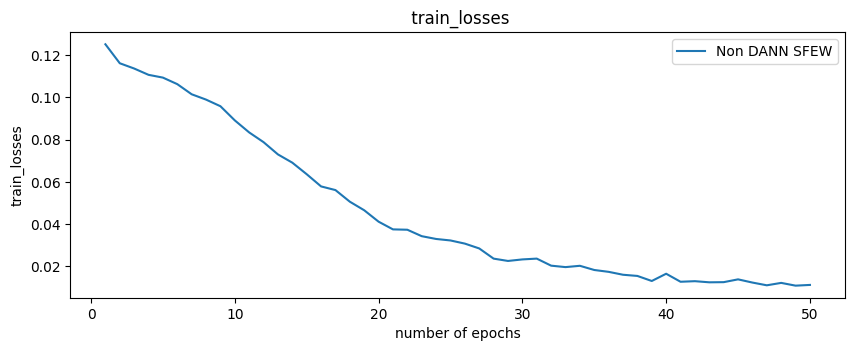

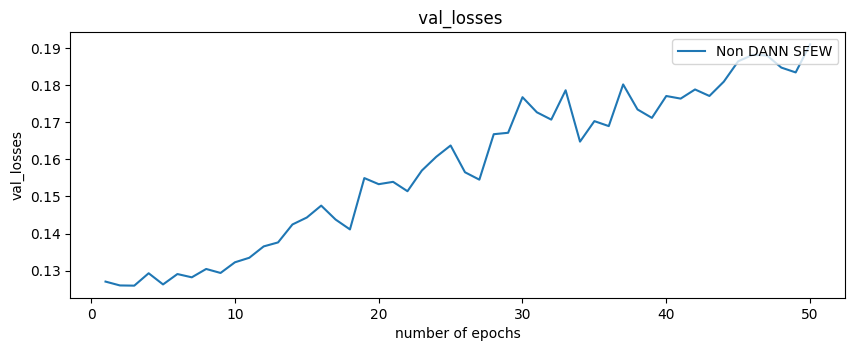

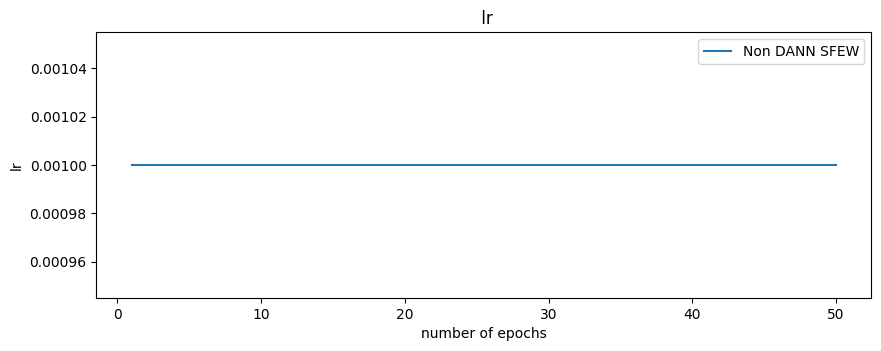

In [21]:
plot_loss_curves(dict_non_dann_losses,mode='train_losses')
plot_loss_curves(dict_non_dann_losses,mode='val_losses')
plot_loss_curves(dict_non_dann_losses,mode='lr')

### Saving NON DANN Model

In [22]:
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [23]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(non_dann_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [24]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_non_dann_losses_list, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_non_dann_losses_list[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

In [25]:
# plot_loss_curves(dict_non_dann_losses_list,mode='train_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='val_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='lr')

In [26]:
# model_name = model_name #"non_dann_sfew_19_12.pt"

## Loading NON DANN Model for DANN and DANN EWC


In [27]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # Typical - non_dann_sfew_expw_30_01.pt This may change, use specific model name if required4
model_name

'non_dann_sfew_expw_31_01.pt'

In [28]:
# best_model_dann = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# best_model_dann_ewc = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# model_dann = deepcopy(non_dann_model) # saves training time - check with all
# model_dann_ewc = deepcopy(non_dann_model) # saves training time - check with all

In [29]:
# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

loaded_model_non_dann = DANN(num_classes=7, backbone = 'resnet18') # skeleton copy
best_model_dann = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
best_model_dann_ewc = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy

loaded_model_non_dann.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))

# loaded_model_non_dann.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, model_name),map_location=torch.device(device)))
model_dann = deepcopy(loaded_model_non_dann) # saves training time - check with all
model_dann_ewc = deepcopy(loaded_model_non_dann) # saves training time - check with all


# print(model_dann)

feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model


In [30]:
# #checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.parameters(), model_dann.parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
# print ('True')

## DANN Execution :  Training, Validating, Saving


### DANN Execution Function

In [31]:

def execute_dann(model,
                 device,
                 source_train_loader, source_val_loader,
                 target_train_loader, target_val_loader,
                 optimizer,
                 n_epochs, # total number of epochs (different from individual epoch)
                 class_loss_function = nn.CrossEntropyLoss(),
                 domain_loss_function = nn.BCEWithLogitsLoss(),
                 scheduler = None,
                 early_stop_patience = None,
                 early_stop_difference = None
                 ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr =[] # to capture lr over epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)

    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_model_state = None # Initialize variables to track the best model state


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch[{}/{}] Step[{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.2f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # Check if the current model has the best validation loss
        print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        if avg_val_task_loss < best_val_loss:
          best_val_loss = avg_val_task_loss
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with validation loss: {best_val_loss}\n')


        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop


    # Testing when the training is over - completed or early stopped
    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses





In [39]:
lr_dann = runconfig.inital_lr
lr_dann = lr_dann / 5.0 # OVERRIDE
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                    source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                    target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                    target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain,
                                                    scheduler = scheduler,
                                                    early_stop_patience = early_stop_patience,
                                                    early_stop_difference = early_stop_difference
                                                    )

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function
Epoch[1/50] Step[1/60]: loss_total=3.2169 / domain_loss_target=0.7404 / domain_loss_source=0.6596 / task_loss=1.8169 / domain_loss=2.4765 / alpha=0.00 / lr=0.000200
Epoch[1/50] Step[11/60]: loss_total=3.1342 / domain_loss_target=0.7426 / domain_loss_source=0.6475 / task_loss=1.7441 / domain_loss=2.3916 / alpha=0.02 / lr=0.000200
Epoch[1/50] Step[21/60]: loss_total=3.3376 / domain_loss_target=0.7669 / domain_loss_source=0.6784 / task_loss=1.8923 / domain_loss=2.5707 / alpha=0.03 / lr=0.000200
Epoch[1/50] Step[31/60]: loss_total=3.0272 / domain_loss_target=0.7617 / domain_loss_source=0.6789 / task_loss=1.5865 / domain_loss=2.2655 / alpha=0.05 / lr=0.000200
Epoch[1/50] Step[41/60]: loss_total=3.0751 / domain_loss_target=0.7337 / domain_loss_source=0.6519 / task_loss=1.6895 / domain_loss=2.3414 / alpha=0.07 / lr=0.000200
Epoch[1/50] Step[51/60]: loss_total=3.2125 / domain_loss_target=0.769

In [33]:
# dict_dann_losses

### DANN Plotting and Validation

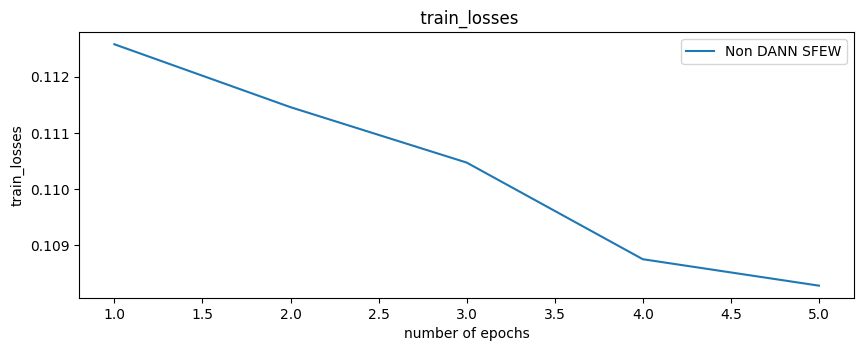

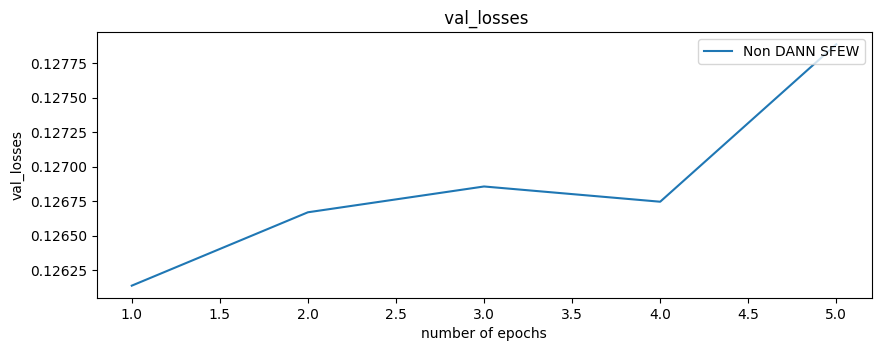

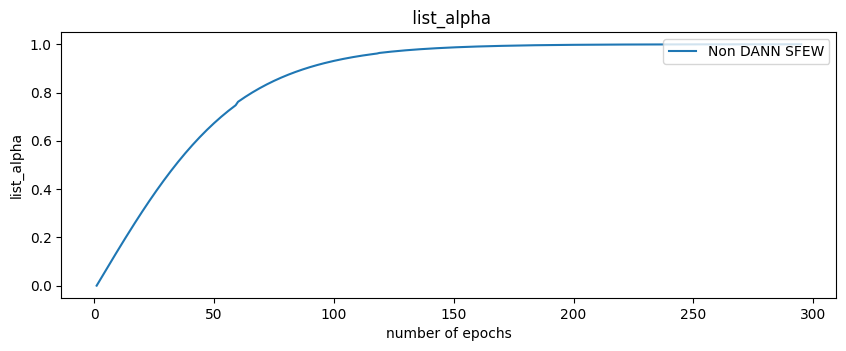

In [34]:
plot_loss_curves(dict_dann_losses,mode='train_losses')
plot_loss_curves(dict_dann_losses,mode='val_losses')
plot_loss_curves(dict_dann_losses,mode='list_alpha')


### Saving DANN Model

In [40]:
model_dann

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [44]:
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
MODEL_DIR

PosixPath('/content/gdrive/MyDrive/CV_FER/models')

In [42]:

dann_model_name = f'dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # "dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(dann_model_name)

# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'dann_{source_name}_{target_name}'))
# try:
#     DANN_SFEW_EXPW_DIR = Path(dataconfig_1.DANN_SFEW_EXPW_DIR)
# except:
#     DANN_SFEW_EXPW_DIR =Path(dataconfig_1.MODEL_DIR,"dann_sfew_expw")


if not DANN_MODEL_DIR.exists():
    # Create the directory
    DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {DANN_MODEL_DIR} already exists.')


try:
    torch.save(model_dann.state_dict(), Path(DANN_MODEL_DIR,dann_model_name))
    print(f'{dann_model_name} SAVED at {Path(DANN_MODEL_DIR,dann_model_name)}!')
except:
    print(f'Problem in saving {dann_model_name}, NOT SAVED!')


dann_sfew_expw_31_01.pt
Directory /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw already exists.
dann_sfew_expw_31_01.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw/dann_sfew_expw_31_01.pt!


## DANN EWC : Training, Validating, Saving

In [ ]:
# dataconfig_inference = DataConfig()

# # NON DANN
# non_dann_model_sfew_name = 'non_dann_sfew_20_01.pt'
# non_dann_model_inference = DANN(num_classes=7) # skeleton copy
# NON_DANN_SFEW_DIR = dataconfig_inference.NON_DANN_SFEW_DIR # Path(self.MODEL_DIR,"non_dann_sfew")

# try:
#     non_dann_model.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, non_dann_model_sfew_name),
#                                                         map_location=torch.device(device)))
#     print(f'{non_dann_model_sfew_name} locked and loaded')
# except:
#     print(f' problem in loading {non_dann_model_sfew_name}')


In [ ]:
# model_dann_ewc = non_dann_model # saves training time - check with all


In [45]:
model_dann_ewc

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

### EWC Code
Regularization Penalty

In [46]:

from torch.autograd import Variable
from torch.autograd import Function
from da_cv_fer.run_config import RunConfig

runconfig = RunConfig()
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model: nn.Module,
                 data_loader: torch.utils.data.DataLoader
                #  dataset: list
                 ,device=device
                 , class_loss_function = runconfig.criterion_class):

        self.model = model
        # print("----------MODEL--------\n",self.model)
        self.dataset = data_loader
        self.device = device
        self.class_loss_function = class_loss_function

        # creating dictionary of params which required grad
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}

        self._means = {}
        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

        # print("--------self._means----------------\n", self._means)

        self._precision_matrices = self._diag_fisher()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
        # print("--------PRECISION MATRICES----------------\n", precision_matrices)

        self.model.eval()
        for batch in self.dataset:
            self.model.zero_grad()
            images, labels  = variable(batch[0].to(device)), variable(batch[1].to(device))
            class_ouputs, _ , _ = model(images) # class_output, domain_output, features
            task_loss =  self.class_loss_function(class_ouputs,labels)
            task_loss.backward() # only calculating the gradients, not updating it
            # print("--------task loss----------------\n", task_loss)

            for n, p in self.model.named_parameters():
              # if type(p.grad)
              if isinstance(p.grad, type(None)):
                pass # parameter value would remain as it is
              else:
                # print(n,":", type(p.grad))
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

**DANN EWC Object.**

In [ ]:
# ewc_object = EWC(deepcopy(model_dann_ewc),
#                  data_loader=data_loader['source']['train'],#sfew_train_loader,
#                  device=device,
#                  class_loss_function=runconfig.criterion_class)

### DANN EWC Execution (training and testing) Function without Learning rate
Training Function

In [47]:
def execute_dann_ewc(model,
                     device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss(),
                     EWC_LAMBDA = 0.4, # to understand regularlization
                     scheduler = None,
                     early_stop_patience = None,
                     early_stop_difference = None
                     ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr = [] # to capture lr changes across epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    existing_model = deepcopy(model)
    model = deepcopy(model).to(device) # copies params from existing model to another one https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492/2
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]
    #TODO: Scheduler
    # scheduler = ReduceLROnPlateau(optimizer, factor = 0.1, patience = 5, threshold =  0.0005, verbose = True)

    ewc_object = EWC(deepcopy(model),
                     data_loader=source_train_loader,
                     device=device,
                     class_loss_function=class_loss_function) # instantiating EWC object, we would use this object for understanding penalty


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_model_state = None # Initialize variables to track the best model state


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in EWC DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter(target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            # Calculating source class loss, regularlized by EWC
            loss_source_class = class_loss_function(source_class_outputs, source_labels) + EWC_LAMBDA * ewc_object.penalty(model)# calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device) # Target Image == [0., 1.]

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)


            # after 10 batches
            if (batch_idx % 50 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # Check if the current model has the best validation loss
        print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        if avg_val_task_loss < best_val_loss:
          best_val_loss = avg_val_task_loss
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with validation loss: {best_val_loss}\n')

        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop

    # Testing when the training is over - completed or early stopped

    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct_source, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    accuracy_source = correct_source / len(source_val_loader.dataset)

    correct_target, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    accuracy_target = correct_target / len(target_val_loader.dataset)


    dict_ewc_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'test_accuracy_source' : accuracy_source,
                        'test_accuracy_target':accuracy_target,
                            'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_ewc_dann_losses





### DANN EWC Execute

In [53]:
runconfig = RunConfig()
lr_ewc_dann = runconfig.inital_lr#/5.0 #override
optimizer_ewc_dann = optim.SGD(model_dann.parameters(), lr = lr_ewc_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 5 # override

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

try:
    EWC_LAMBDA = runconfig.EWC_LAMBDA
except:
    EWC_LAMBDA = 0.4

print(EWC_LAMBDA)

print(f'------------training started for EWC DANN Model ------------------')

ewc_dann_model , dict_ewc_dann_losses = execute_dann_ewc(model=model_dann,
                                                          device=device,
                                                          source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                          source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                          target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                          target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                          optimizer = optimizer_ewc_dann,
                                                          n_epochs = n_epochs,
                                                          class_loss_function = runconfig.criterion_class,
                                                          domain_loss_function = runconfig.criterion_domain,
                                                          EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
                                                          scheduler = None,
                                                          early_stop_patience = None,
                                                          early_stop_difference = None)

0.4
------------training started for EWC DANN Model ------------------
epoch = 1...in EWC DANN execution function
Epoch [1/50] Step [1/60]: loss_total=3.1626 / domain_loss_target=0.7378 / domain_loss_source=0.6848 / task_loss=1.7400 / domain_loss=2.4248 / alpha=0.0000 / lr=0.001000
Epoch [1/50] Step [51/60]: loss_total=3.1479 / domain_loss_target=0.7295 / domain_loss_source=0.6874 / task_loss=1.7310 / domain_loss=2.4184 / alpha=0.0831 / lr=0.001000
Test / Val: Average loss: 0.1272, Accuracy: 68/436 (15.60%)

Last Epoch Val Loss = 0.12716132675835845 | Best Val Loss = inf
Updated the best model with validation loss: 0.12716132675835845

epoch = 2...in EWC DANN execution function
Epoch [2/50] Step [1/60]: loss_total=3.2298 / domain_loss_target=0.7344 / domain_loss_source=0.6726 / task_loss=1.8229 / domain_loss=2.4954 / alpha=0.0997 / lr=0.001000
Epoch [2/50] Step [51/60]: loss_total=3.0372 / domain_loss_target=0.7311 / domain_loss_source=0.6645 / task_loss=1.6415 / domain_loss=2.3061 / a

### DANN EWC Plotting and Validation

In [54]:
dict_ewc_dann_losses['test_loss_source'], dict_ewc_dann_losses['test_loss_target']

(0.1268784031955474, 0.12484440576837627)

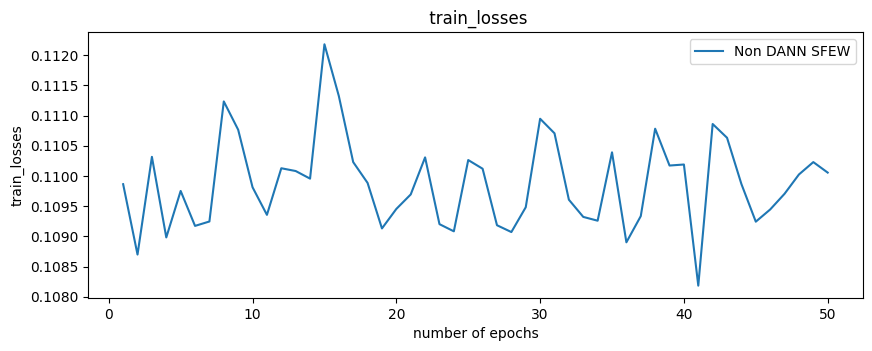

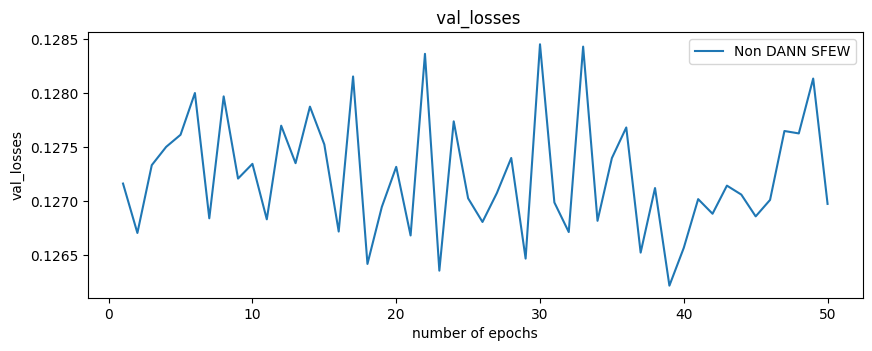

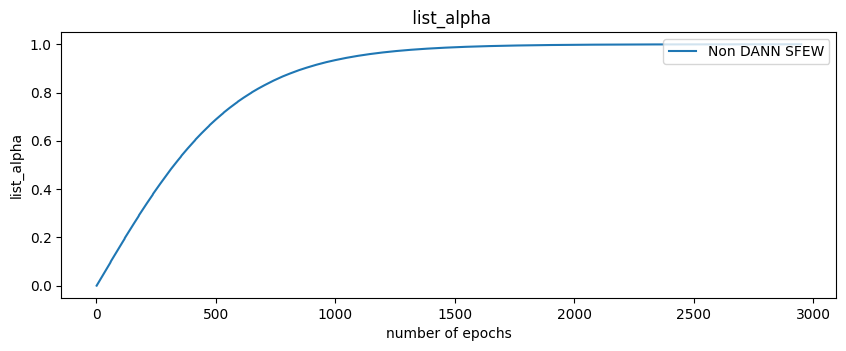

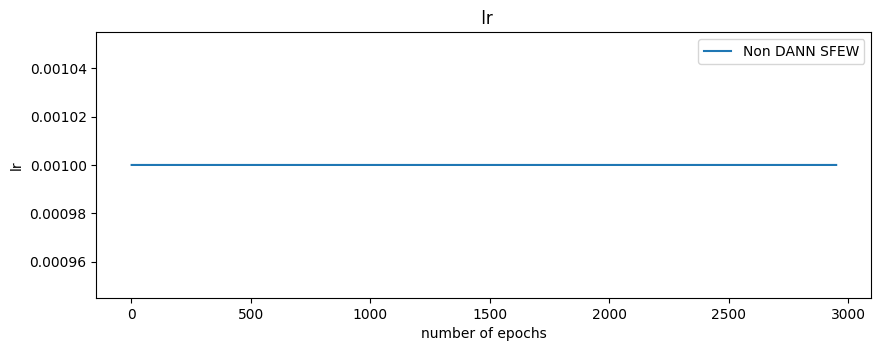

In [57]:
plot_loss_curves(dict_ewc_dann_losses,mode='train_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='val_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='list_alpha')
plot_loss_curves(dict_ewc_dann_losses,mode='lr')

### Saving DANN EWC Model

In [58]:
# ewc_dann_model_name = 'ewc_dann_sfew_expw_30_01.pt'
ewc_dann_model_name = f'ewc_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"ewc_dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(ewc_dann_model_name)

from da_cv_fer.data_config import DataConfig
dataconfig_2 = DataConfig()
MODEL_DIR = dataconfig_2.MODEL_DIR


EWC_DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'ewc_dann_{source_name}_{target_name}'))
# try:
#     EWC_DANN_SFEW_EXPW_DIR = Path(dataconfig_2.EWC_DANN_SFEW_EXPW_DIR)
# except:
#     EWC_DANN_SFEW_EXPW_DIR =Path(dataconfig_2.MODEL_DIR,"ewc_dann_sfew_expw")


if not EWC_DANN_MODEL_DIR.exists():
    # Create the directory
    EWC_DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {EWC_DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {EWC_DANN_MODEL_DIR} already exists.')

try:
    torch.save(ewc_dann_model.state_dict(), Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name))
    print(f'{ewc_dann_model_name} SAVED at {Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name)}!')
except:
    print(f'Problem in saving {ewc_dann_model_name}, NOT SAVED!')


ewc_dann_sfew_expw_31_01.pt
Directory /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw already exists.
ewc_dann_sfew_expw_31_01.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw/ewc_dann_sfew_expw_31_01.pt!
